In [ ]:
# Part 2: Data Analysis for Autonomous Car
# Task: AIML Capstone
# Task: Part2
# Developer: Soumen Dey, Date: July-2025
# License: BSD
# Develomenet tool: google colab
#-------------------------------------------------------------------


In [198]:
# STEP: 1 --------------------------------------------------------------
# read the csv to panda df
import pandas as pd

dataSetURL = 'https://raw.githubusercontent.com/Rimbik/assessments/refs/heads/main/gen-ai/capstone1/ds/Tesla-Deaths.csv'
# csvFilePath = 'Tesla-Deaths.csv'
csvFilePath = dataSetURL
df = pd.read_csv(csvFilePath)

df.head(3)

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN


In [199]:
# STEP: 2 --------------------------------------------------------------

# Data cleanup
#------------------------------------------
# rmv all NaN from the df
# df = df.dropna()
# df1 = df.reset_index(drop=True)

# replace all NaN data for Note column with empty string
df.columns



Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')

In [200]:
# STEP: 3 --------------------------------------------------------------

#remove spaces between col names
df.columns = df.columns.str.replace(' ', '')

#replace all NaN data for Note column with empty string
df['Note'] = df['Note'].fillna('')

#replace all deceased col NaN with numeric 0
df['Deceased1'] = df['Deceased1'].fillna(0)
df['Deceased2'] = df['Deceased2'].fillna(0)
df['Deceased3'] = df['Deceased3'].fillna(0)
df['Deceased4'] = df['Deceased4'].fillna(0)

#replace all Deaths col NaN with numeric 0
df['Deaths'] = df['Deaths'].fillna(0)

# delete all rows with either All NaN or 0 or empty data
df = df.dropna()
df = df.reset_index(drop=True)

df.head(3)



,Case#,Year,Date,Country,State,Description,Deaths,Tesladriver,Teslaoccupant,Othervehicle,...,VerifiedTeslaAutopilotDeaths,VerifiedTeslaAutopilotDeaths+AllDeathsReportedtoNHTSASGO,Unnamed:16,Unnamed:17,Source,Note,Deceased1,Deceased2,Deceased3,Deceased4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,,0,0,0,0.0
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,,Taren Singh Lal,0,0,0.0
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,,0,0,0,0.0


In [201]:

# find yeraly death count from the df
df.columns

Index(['Case#', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesladriver', 'Teslaoccupant', 'Othervehicle', 'Cyclists/Peds',
       'TSLA+cycl/peds', 'Model', 'Autopilotclaimed',
       'VerifiedTeslaAutopilotDeaths',
       'VerifiedTeslaAutopilotDeaths+AllDeathsReportedtoNHTSASGO',
       'Unnamed:16', 'Unnamed:17', 'Source', 'Note', 'Deceased1', 'Deceased2',
       'Deceased3', 'Deceased4'],
      dtype='object')

In [202]:
# STEP: 4 --------------------------------------------------------------
# b. Analyze the different aspects of the death events. For example:
# ======================================================================
### b. Analyze the different aspects of the death events. For example:

## show yearwise death with highest death 1st (What is the number of victims (deaths) in each accident?)
# for USA
df.groupby('Year')['Deaths'].sum().sort_values(ascending=False)
# df.groupby('Year')['Deaths'].sum()




,Deaths
Year,
2022.0,93.0
2021.0,69.0
2019.0,50.0
2020.0,43.0
2018.0,20.0
2016.0,15.0
2017.0,11.0
2014.0,6.0
2015.0,4.0


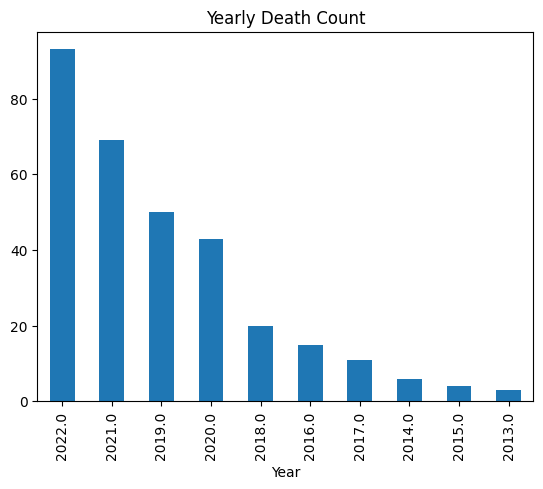

In [203]:

# plot the rate
import matplotlib.pyplot as plt
df.groupby('Year')['Deaths'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Yearly Death Count')
plt.show()

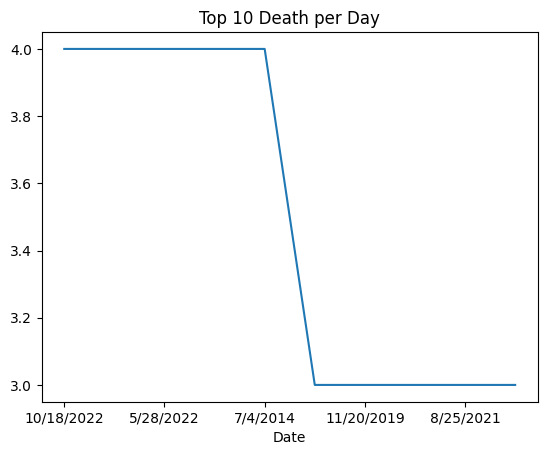

In [204]:

# STEP: 5 --------------------------------------------------------------
# Perform an in-depth exploratory data analysis on the number of events by date, per year, and
# per day for each state and country

# identify death perday (top10 death in single day)
df.groupby('Date')['Deaths'].sum().sort_values(ascending=False).head(10).plot(kind='line')
plt.title('Top 10 Death per Day')
plt.show()




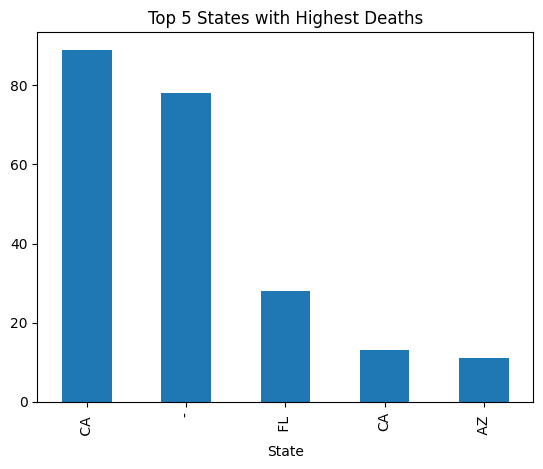

In [205]:
# STEP: 7 --------------------------------------------------------------

# identify top deaths by state
df.groupby('State')['Deaths'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 States with Highest Deaths')
plt.show()


In [206]:
# events by date, top year, top state and  top country
# 1 death per day

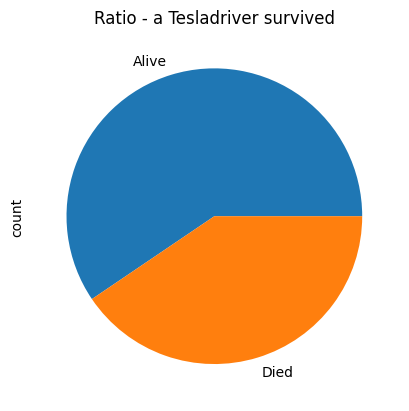

In [207]:
# STEP: 7 --------------------------------------------------------------
#
# b.How many times did tesla drivers die?

df1 = df.copy()

# set the column to numeric 0 where data is - for column 'Tesladriver'
df1['Tesladriver'] = pd.to_numeric(df1['Tesladriver'], errors='coerce').fillna(0)

# Map 1.0 to True and 0.0 to False
df1['Tesladriver'] = df1['Tesladriver'].map({1.0: 'Died', 0.0: 'Alive'})

# display pie chart for percetage a Tesladriver dies on accident
df1['Tesladriver'].value_counts().plot(kind='pie')
plt.title('Ratio - a Tesladriver survived')
plt.show()




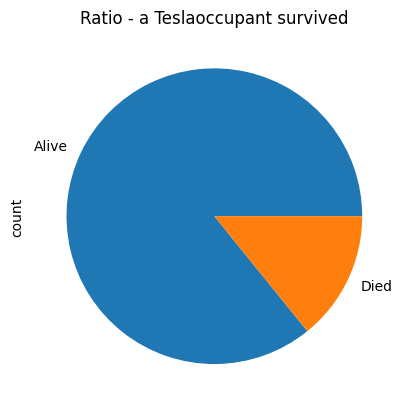

In [209]:
# b.How many times did tesla Teslaoccupant die?
df2 = df.copy()

#
typeOfPass = "Teslaoccupant"
# set the column to numeric 0 where data is - for column 'Tesladriver'
df2[typeOfPass] = pd.to_numeric(df2[typeOfPass], errors='coerce').fillna(0)

# Map 1.0 to True and 0.0 to False
df2[typeOfPass] = df2[typeOfPass].map({1.0: 'Died', 0.0: 'Alive'})

# display pie chart for percetage a Tesladriver dies on accident
df2[typeOfPass].value_counts().plot(kind='pie')
plt.title('Ratio - a Teslaoccupant survived')
plt.show()

In [210]:
df.head(4)

,Case#,Year,Date,Country,State,Description,Deaths,Tesladriver,Teslaoccupant,Othervehicle,...,VerifiedTeslaAutopilotDeaths,VerifiedTeslaAutopilotDeaths+AllDeathsReportedtoNHTSASGO,Unnamed:16,Unnamed:17,Source,Note,Deceased1,Deceased2,Deceased3,Deceased4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,,0,0,0,0.0
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,,Taren Singh Lal,0,0,0.0
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,,0,0,0,0.0
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,,0,0,0,0.0


In [211]:
#
# STEP: 8 --------------------------------------------------------------
#  clean the data for TSLA+cycl/peds
df['TSLA+cycl/peds'] = pd.to_numeric(df['TSLA+cycl/peds'], errors='coerce').fillna(0)

#show data for no of times the teslavehicles hits a cyclist or a pedestrian
print("## No of times a Tesla vehicles hits a cyclist or a pedestrian >>\n")
df['TSLA+cycl/peds'].value_counts().rename_axis('cyclist/pedestrian hits').reset_index(name='Count')




## No of times a Tesla vehicles hits a cyclist or a pedestrian >>



,cyclist/pedestrian hits,Count
0,1.0,144
1,0.0,101
2,2.0,17
3,3.0,2


In [212]:
# STEP: 9 --------------------------------------------------------------

# No of times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?

print("*** How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?")
print("\nANS: This is unclear from the data as records says death of driver but no indication if cyclist or pedestrian died.")
# clean the data
# df['TSLA+cycl/peds'] = pd.to_numeric(df['TSLA+cycl/peds'], errors='coerce').fillna(0)

# # no of time a driver or occupant died after hitting TSLA+cycl/peds
# print("## No of times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian >>\n")
# # df['TSLA+cycl/peds'].value_counts().rename_axis('cyclist/pedestrian hits').reset_index(name='Count')
# # get record for Death = 1.0 and (Tesladriver	or Teslaoccupant) = 1.0
# df1 = df[(df['Death'] == 1.0) & ((df['Tesladriver'] == 1.0) | (df['Teslaoccupant'] == 1.0))] & ()
# df1

# df.head(2)

*** How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?

ANS: This is unclear from the data as records says death of driver but no indication if cyclist or pedestrian died.


In [213]:
df.columns

Index(['Case#', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesladriver', 'Teslaoccupant', 'Othervehicle', 'Cyclists/Peds',
       'TSLA+cycl/peds', 'Model', 'Autopilotclaimed',
       'VerifiedTeslaAutopilotDeaths',
       'VerifiedTeslaAutopilotDeaths+AllDeathsReportedtoNHTSASGO',
       'Unnamed:16', 'Unnamed:17', 'Source', 'Note', 'Deceased1', 'Deceased2',
       'Deceased3', 'Deceased4'],
      dtype='object')

In [214]:
# STEP: 10 --------------------------------------------------------------

# Get no of time the Othervehicle collided compared to >> 'Othervehicle', 'Cyclists/Peds' and 'TSLA+cycl/peds'
df['Othervehicle'] = pd.to_numeric(df['Othervehicle'], errors='coerce').fillna(0)
df['Cyclists/Peds'] = pd.to_numeric(df['Cyclists/Peds'], errors='coerce').fillna(0)


Total accident : 264, Other Vehicle had Accident : 100
Percentage of accidents involving 'Other Vehicle': 37.88%


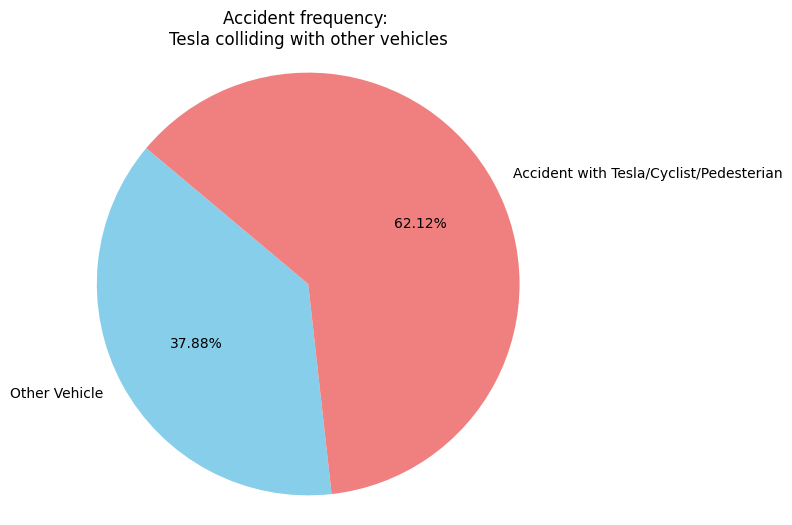

In [215]:
# Get all rows where "OtherVehicles" has value
# frequency of Tesla colliding with other vehicles
df['Othervehicle'] = pd.to_numeric(df['Othervehicle'], errors='coerce').fillna(0)

rowCountOtherVehicleHit = len(df[df['Othervehicle'] != 0])
totalDataRowcount = len(df)
totalDataRowcount,rowCountOtherVehicleHit
print(f"Total accident : {totalDataRowcount}, Other Vehicle had Accident : {rowCountOtherVehicleHit}" )


# Calculate the percentage
percentage = (rowCountOtherVehicleHit / totalDataRowcount) * 100

# Print the result
print(f"Percentage of accidents involving 'Other Vehicle': {percentage:.2f}%")

# show plots
import matplotlib.pyplot as plt

# Data
total_accidents = totalDataRowcount
other_vehicle_accidents = rowCountOtherVehicleHit
other_accidents = total_accidents - other_vehicle_accidents

# Labels and values
labels = ['Other Vehicle', 'Accident with Tesla/Cyclist/Pedesterian']
values = [other_vehicle_accidents, other_accidents]
colors = ['skyblue', 'lightcoral']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Accident frequency: \nTesla colliding with other vehicles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Show the plot
plt.show()






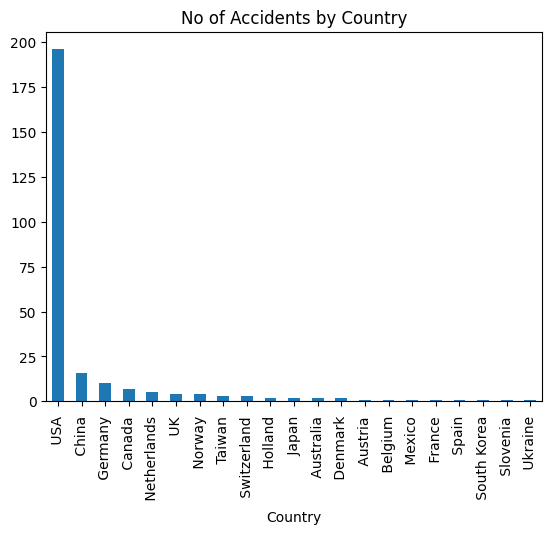

In [216]:
# TOP Countries with Accidents
#-------------------------------------------------------------------------
df['Country'].groupby(df['Country']).count().sort_values(ascending=False)
#show plots
df['Country'].groupby(df['Country']).count().sort_values(ascending=False).plot(kind='bar')
plt.title('No of Accidents by Country')
plt.show()





[' USA ' ' Canada ' ' China ' ' Mexico ' ' UK ' ' Australia '
 ' Netherlands ' ' Switzerland ' ' France ' ' Germany ' ' Denmark '
 ' Belgium ' ' South Korea ' ' Norway ' ' Taiwan ' ' Slovenia '
 ' Austria ' ' Ukraine ' ' Spain ' ' Holland ' ' Japan '] Index(['Case#', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesladriver', 'Teslaoccupant', 'Othervehicle', 'Cyclists/Peds',
       'TSLA+cycl/peds', 'Model', 'Autopilotclaimed',
       'VerifiedTeslaAutopilotDeaths',
       'VerifiedTeslaAutopilotDeaths+AllDeathsReportedtoNHTSASGO',
       'Unnamed:16', 'Unnamed:17', 'Source', 'Note', 'Deceased1', 'Deceased2',
       'Deceased3', 'Deceased4'],
      dtype='object')

------------------

Country Name :  USA  - with yearly death rate


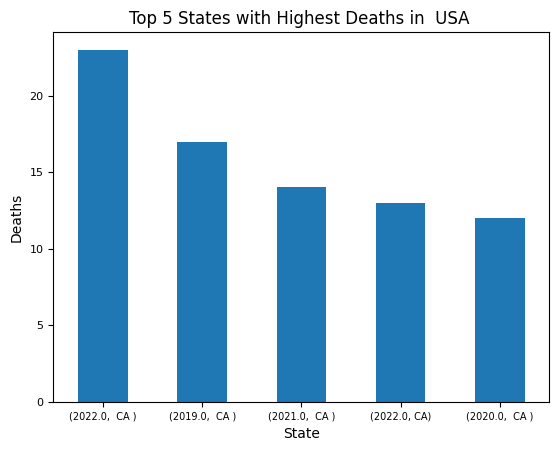


Country Name :  Canada  - with yearly death rate


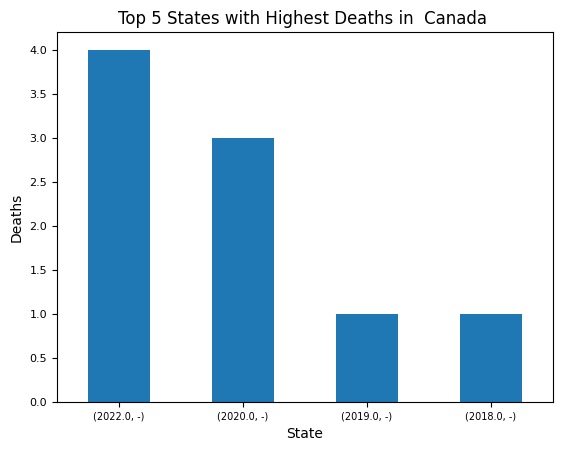


Country Name :  China  - with yearly death rate


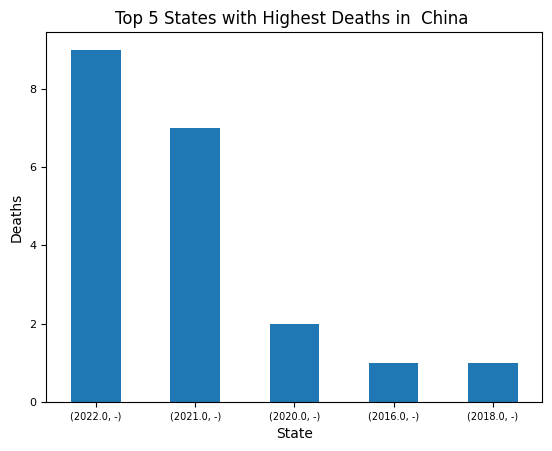


Country Name :  Mexico  - with yearly death rate


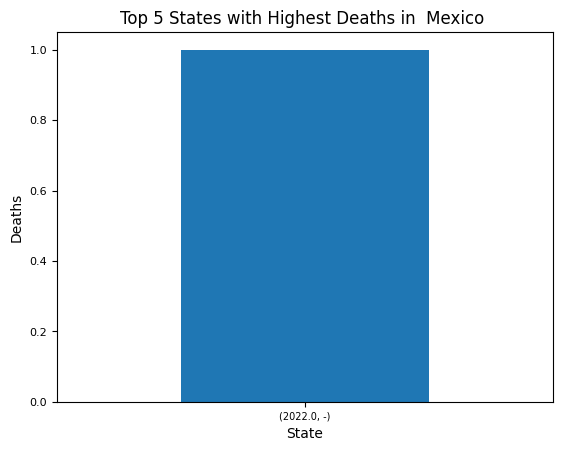


Country Name :  UK  - with yearly death rate


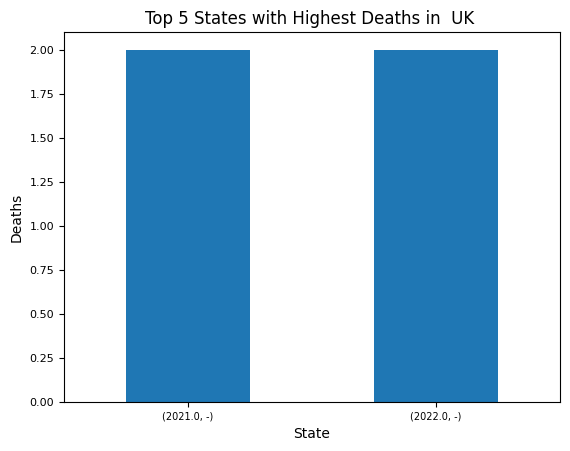


Country Name :  Australia  - with yearly death rate


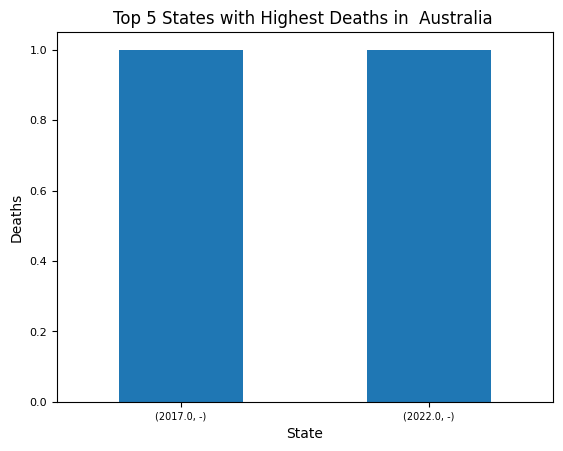


Country Name :  Netherlands  - with yearly death rate


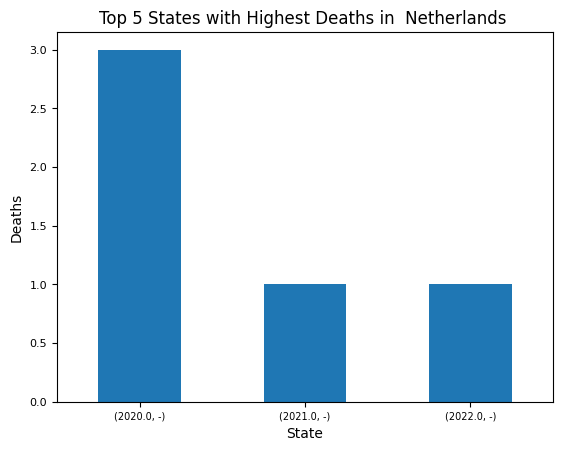


Country Name :  Switzerland  - with yearly death rate


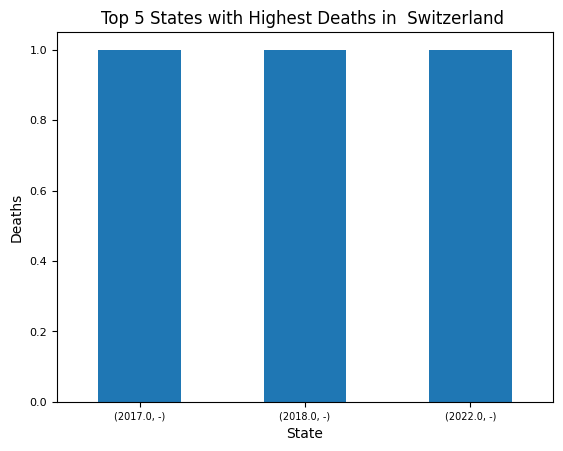


Country Name :  France  - with yearly death rate


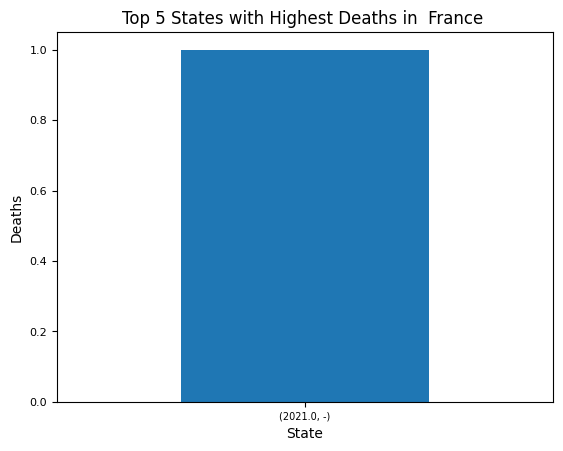


Country Name :  Germany  - with yearly death rate


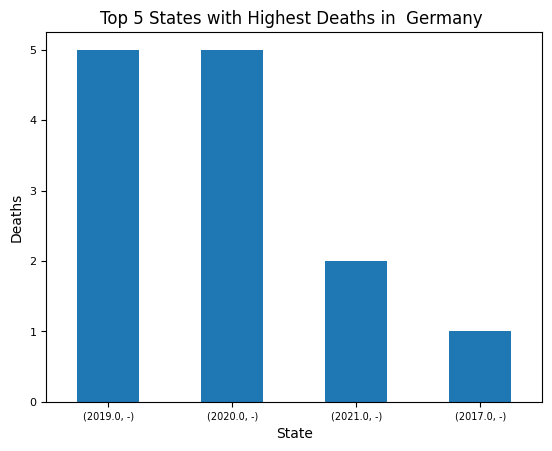


Country Name :  Denmark  - with yearly death rate


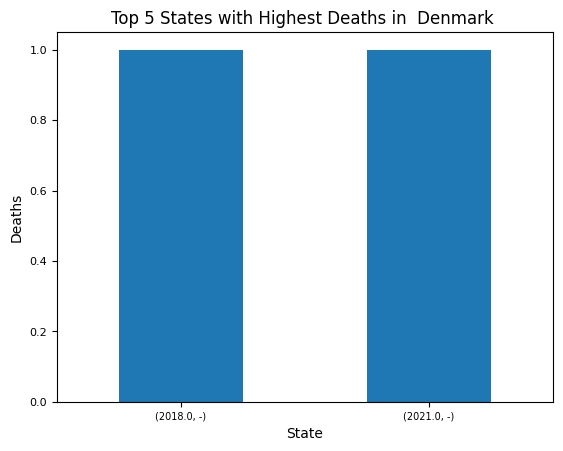


Country Name :  Belgium  - with yearly death rate


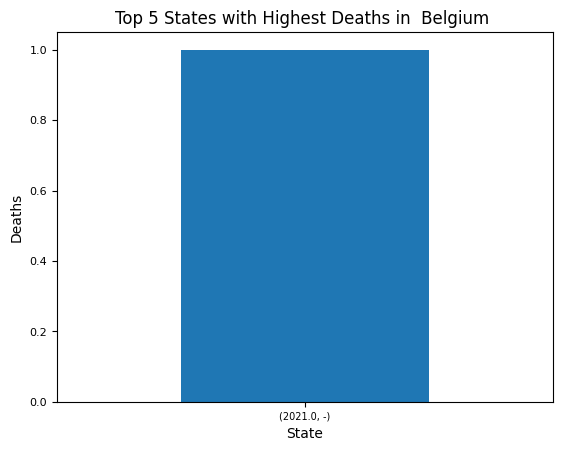


Country Name :  South Korea  - with yearly death rate


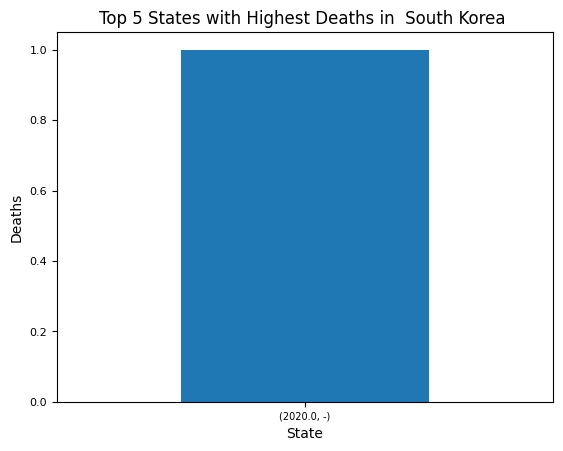


Country Name :  Norway  - with yearly death rate


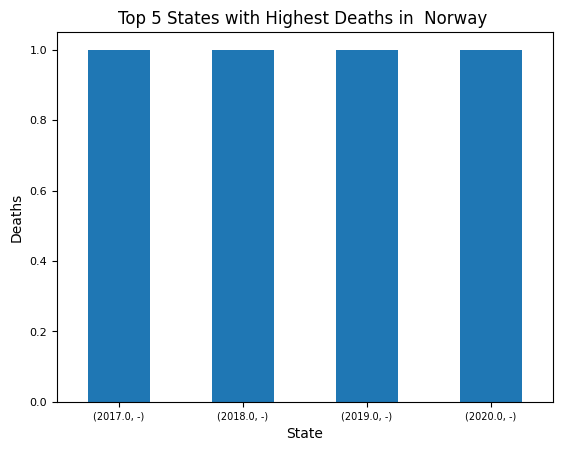


Country Name :  Taiwan  - with yearly death rate


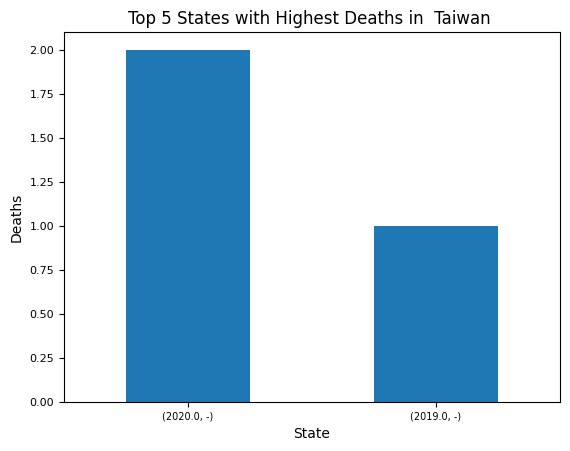


Country Name :  Slovenia  - with yearly death rate


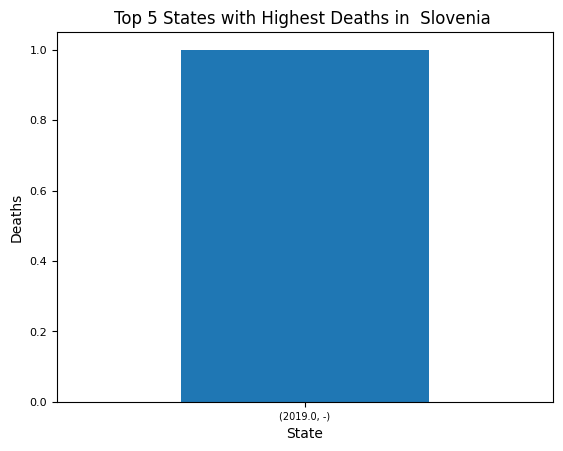


Country Name :  Austria  - with yearly death rate


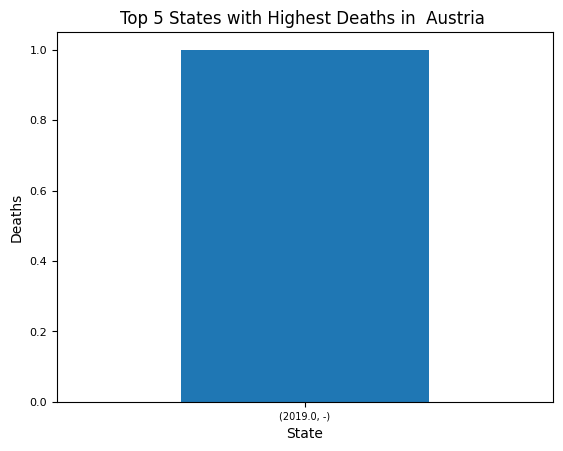


Country Name :  Ukraine  - with yearly death rate


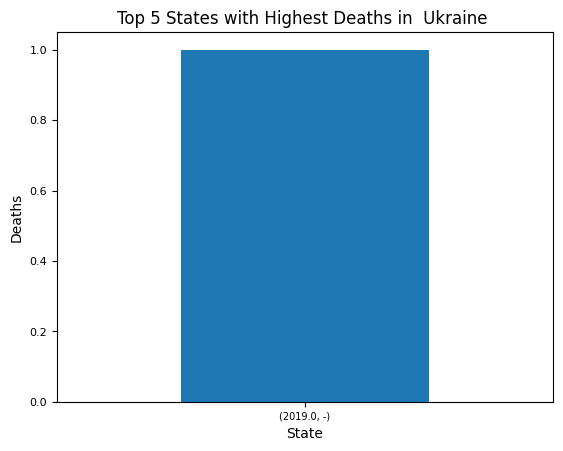


Country Name :  Spain  - with yearly death rate


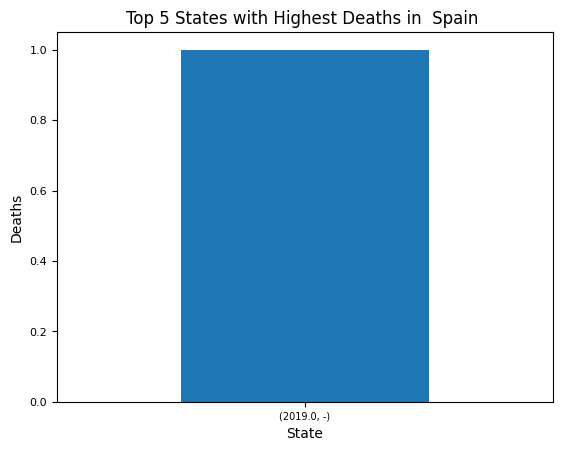


Country Name :  Holland  - with yearly death rate


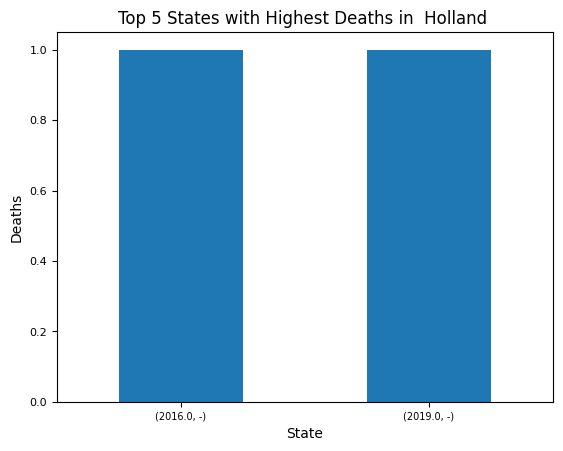


Country Name :  Japan  - with yearly death rate


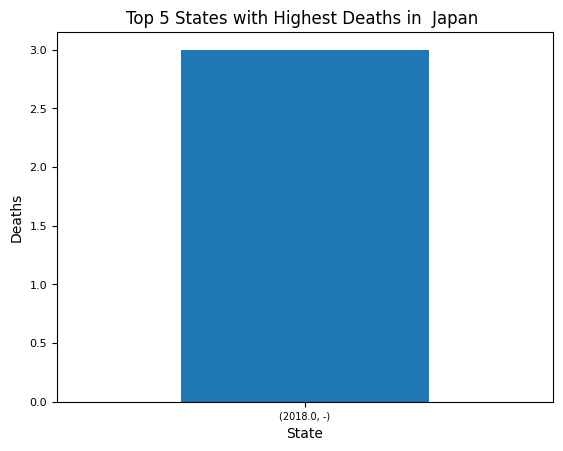

In [217]:
# save the unique country names in array
unique_countries = df['Country'].unique()
print(unique_countries, df.columns)

print("\n------------------")

# loop this array to create plot for death by state
for country in unique_countries:
   print(f"\nCountry Name : {country} - with yearly death rate")

   #get state wise death count for the country

   import matplotlib.pyplot as plt
   # Filter the DataFrame for the current country
   filtered_df = df[df['Country'] == country]

   #replace all empty state to "NA"
  #  filtered_df['State'] = filtered_df['State'].fillna('NA').replace("-","-")

   # Check if the filtered DataFrame is empty
   if not filtered_df.empty:
       # Group by 'State', sum 'Deaths', sort and plot
       # Create a bar plot
      import matplotlib.pyplot as plt
      grouped = filtered_df.groupby(['Year', 'State'])['Deaths'].sum().sort_values(ascending=False).head(5)

      fig, ax = plt.subplots()
      grouped.plot(kind='bar', x='State', y='Value', ax=ax)

      # Set x-axis font size to small
      ax.tick_params(axis='x', labelsize=7, rotation=0)
      ax.tick_params(axis='y', labelsize=8)
      plt.title(f'Top 5 States with Highest Deaths in {country}')
      plt.xlabel('State')
      plt.ylabel('Deaths')
      plt.show()
   else:
       print(f"No death data available for states in {country}")

#---------------



print("\n\n")

In [ ]:
# ================= END OF CODE ====================